In [1]:
import gpflow
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def model(X):
    n, dim = X.shape
    return np.sum(np.sin(12*X) + 0.66*np.cos(25*X), axis=1)

In [38]:
np.random.seed(0)
dim = 1
model_budget = 10
n_pseudo = 10
X = np.linspace(0, 1, model_budget).reshape(-1, dim)
y = model(X).reshape(-1, 1)
Z = X[np.random.choice(range(model_budget), n_pseudo, replace=False)]

In [76]:
kernel = gpflow.kernels.Matern32(dim)
gp = gpflow.gpr.GPR(X, y, kern=kernel)
gp.likelihood.variance = 2

In [80]:
optim = tf.train.GradientDescentOptimizer(1.)
optim = tf.train.AdagradOptimizer(0.5)
# optim = 'L-BFGS-B'
# optim = 'SLSQP'
gp.optimize(method=optim)

     fun: 12.216544705116171
     jac: array([  3.86031036e-05,   2.89322239e-04,   5.15283518e-08])
 message: 'Finished iterations.'
  status: 'Finished iterations.'
 success: True
       x: array([-0.0978631 , -9.95565213, -0.0387468 ])

In [79]:
gp.compile()

In [81]:
def predict(X):
    return map(np.squeeze, gp.predict_y(X))

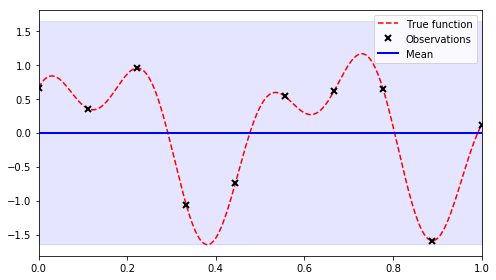

In [82]:
def plot(predict, fig, ax):
    x_plot = np.linspace(0., 1., 1000).reshape(-1, dim)
    y_plot = model(x_plot).reshape(-1, 1)
    y_pred, y_var = predict(x_plot)
    ax.plot(x_plot, y_plot, 'r--', label="True function")
    ax.plot(X, y, 'kx', mew=2, label='Observations')
    ax.plot(x_plot, y_pred, '-b', lw=2, label='Mean')
    ax.fill_between(x_plot.squeeze(), y_pred - 2*np.sqrt(y_var) , y_pred + 2*np.sqrt(y_var), color='blue', alpha=0.1)
    ax.legend(loc=0)
    ax.set_xlim(0, 1)
    fig.tight_layout()

fig, ax = plt.subplots(figsize=(7, 4))
plot(predict, fig, ax)

In [83]:
n_rea = 500
n_sample = 1000
X_rea = np.sort(np.random.rand(n_sample, dim).reshape(-1, dim), axis=0)

In [28]:
%%time
Y_rea = gp.predict_f_samples(X_rea, n_rea).squeeze()

CPU times: user 428 ms, sys: 32 ms, total: 460 ms
Wall time: 151 ms


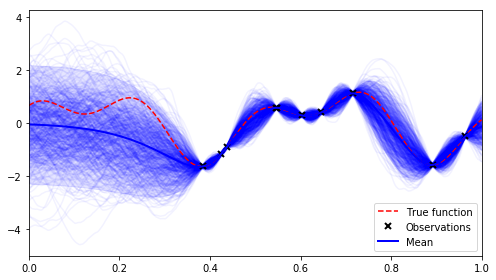

In [29]:
fig, ax = plt.subplots(figsize=(7, 4))
for y_rea in Y_rea:
    ax.plot(X_rea, y_rea, 'b', alpha=0.05)
plot(predict, fig, ax)

In [34]:
import GPy
m = GPy.models.GPRegression(X, y)
m.optimize(messages=True)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s02  0006   1.411409e+01   1.448428e-08 
    00s06  0013   1.411400e+01   1.011721e-10 
Runtime:     00s06
Optimization status: Converged



In [35]:
m.optimize_restarts(num_restarts = 20, parallel=True);

Optimization restart 1/20, f = 1.27135458061
Optimization restart 2/20, f = 14.113996871
Optimization restart 3/20, f = 1.2713529486
Optimization restart 4/20, f = 1.27135334942
Optimization restart 5/20, f = 14.1139911678
Optimization restart 6/20, f = 1.27135314008
Optimization restart 7/20, f = 14.1139914974
Optimization restart 8/20, f = 14.1139907425
Optimization restart 9/20, f = 14.1139931488
Optimization restart 10/20, f = 1.27135327636
Optimization restart 11/20, f = 1.27135295088
Optimization restart 12/20, f = 14.1139950595
Optimization restart 13/20, f = 1.27135294908
Optimization restart 14/20, f = 1.27135427106
Optimization restart 15/20, f = 1.27135300725
Optimization restart 16/20, f = 1.27135301434
Optimization restart 17/20, f = 1.2713529553
Optimization restart 18/20, f = 1.27135495999
Optimization restart 19/20, f = 14.1139939903
Optimization restart 20/20, f = 14.113998528


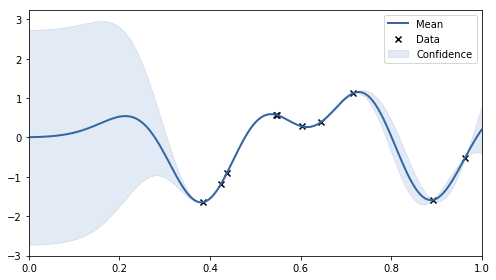

In [36]:
fig, ax = plt.subplots(figsize=(7, 4))
m.plot([0, 1], ax=ax)
fig.tight_layout()

In [38]:
n_rea = 500
n_sample = 10000
X_rea = np.sort(np.random.rand(n_sample, dim).reshape(-1, dim), axis=0)

In [ ]:
%%time
Y_rea = m.posterior_samples_f(X_rea, size=n_rea).T

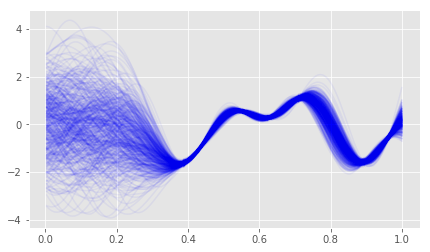

In [37]:
fig, ax = plt.subplots(figsize=(7, 4))
for y_rea in Y_rea:
    ax.plot(X_rea, y_rea, 'b-', alpha=0.05)

CPU times: user 1.18 s, sys: 76 ms, total: 1.25 s
Wall time: 944 ms


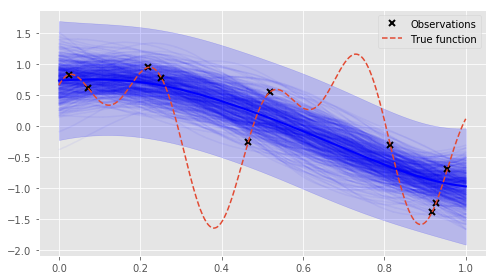